# HCL Stock Price Prediction
### Forecasting the stock price movement for next few days by analysing the past data of 3 years

In [33]:
## Libraries
import pandas as pd
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
data = pd.read_csv("HCL-training.csv")

In [35]:
data.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'LTP', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

### Sorting the data with Date

In [36]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.head(5)

,Date,series,OPEN,HIGH,LOW,PREV_CLOSE,LTP,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2017-07-07,EQ,840.5,840.5,828.8,840.65,832,831.9,832.01,909.6,710.25,1151617,"95,81,53,517.90",43966
1,2017-07-10,EQ,834,856.85,830.1,831.9,848.55,849.65,846.64,909.6,710.25,234294,"19,83,61,677.00",4274
2,2017-07-11,EQ,845.65,869,845.65,849.65,850,850.65,858,909.6,710.25,1496700,"1,28,41,63,046.30",37920
3,2017-07-12,EQ,850.1,858.5,846.05,850.65,856.05,854,851,909.6,710.25,602978,"51,31,36,503.45",44329
4,2017-07-13,EQ,856.1,863.9,855.5,854,859.5,858.6,860.37,909.6,710.25,956409,"82,28,67,012.65",31337


### For forecating i'm considering Closing Price of the Stock

In [37]:
data['close'] = data['close'].apply(lambda x : x.replace(",",""))

In [38]:
data['close'] = pd.to_numeric(data['close'])
training_set = data.iloc[:,7:8].values

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [40]:
X_train = []
y_train = []
for i in range(10, data.shape[0]):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [42]:
 ##Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
954/954 [==============================] - 4s 4ms/sample - loss: 0.1182
Epoch 2/100
954/954 [==============================] - 1s 927us/sample - loss: 0.0194
Epoch 3/100
954/954 [==============================] - 1s 924us/sample - loss: 0.0127
Epoch 4/100
954/954 [==============================] - 1s 909us/sample - loss: 0.0106
Epoch 5/100
954/954 [==============================] - 1s 985us/sample - loss: 0.0111
Epoch 6/100
954/954 [==============================] - 1s 936us/sample - loss: 0.0093
Epoch 7/100
954/954 [==============================] - 1s 921us/sample - loss: 0.0109
Epoch 8/100
954/954 [==============================] - 1s 1ms/sample - loss: 0.0097
Epoch 9/100
954/954 [==============================] - 1s 934us/sample - loss: 0.0097
Epoch 10/100
954/954 [==============================] - 1s 946us/sample - loss: 0.0094
Epoch 11/100
954/954 [==============================] - 1s 1ms/sample - loss: 0.0096
Epoch 12/100
954/954 [==============================] - 1s

In [43]:
dataset_test = pd.read_csv('HCL-test.csv')
#dataset_test['close'] = dataset_test['close'].apply(lambda x : x.replace(",",""))
dataset_test['close'] = pd.to_numeric(dataset_test['close'])
real_stock_price = dataset_test.iloc[:,7:8].values

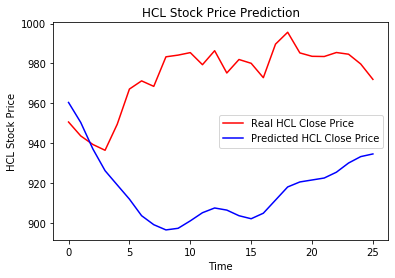

In [48]:
dataset_total = pd.concat((data['close'], dataset_test['close']), axis = 0)
inputs = dataset_total[len(data) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, 36):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real HCL Close Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted HCL Close Price')
plt.title('HCL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HCL Stock Price')
plt.legend()
plt.show()